In [1]:
import numpy as np
import os
import datetime
import os
import matplotlib.pyplot as plt
from imageio import imread
from skimage import io, transform
from skimage.transform import resize

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [3]:
train_doc = np.random.permutation(open('../input/gesture-recognition/train.csv').readlines())
val_doc = np.random.permutation(open('../input/gesture-recognition/val.csv').readlines())

# Batch size handled in class

batch_size = 30
img_size_ht = 120
img_size_wd = 120

In [4]:
def generator(source_path, folder_list, batch_size, factor_ht=0, factor_wd=0 ):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    img_idx = np.arange(0,30,2) #create a list of image numbers you want to use for a particular video
    
    while True:
        t = np.random.permutation(folder_list)


        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                   
                    # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        rem_image = len(folder_list)%batch_size
        batch += 1
        if(rem_image!=0):
            batch_data = np.zeros((rem_image,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((rem_image,5)) # batch_labels is the one hot representation of the output
            for folder in range(rem_image): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                   # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
            

In [5]:
def loss(history):
        acc = history.history['categorical_accuracy']
        val_acc = history.history['val_categorical_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(len(history.history['loss']))

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()

In [6]:
curr_dt_time = datetime.datetime.now()
train_path = '../input/gesture-recognition/train'
val_path = '../input/gesture-recognition/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 10 # choose the number of epochs
print ('# epochs =', num_epochs)
num_classes = 5

# training sequences = 663
# validation sequences = 100
# epochs = 10


### Testing Generator function

Source path =  ../input/gesture-recognition/train ; batch size = 32


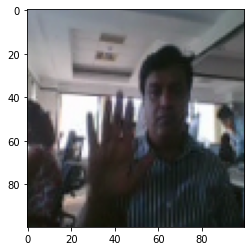

In [7]:
# Test Generator Function

xtrain=generator(train_path,train_doc, 32 )
x=next(xtrain)
plt.imshow(x[0][1][1])

Source path =  ../input/gesture-recognition/train ; batch size = 32


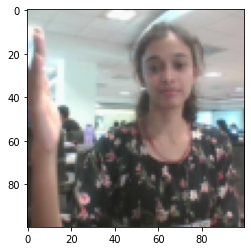

In [8]:
# Test Crop in Generator Function

xtrain=generator(train_path,train_doc, 32, factor_ht=10, factor_wd=10)
x=next(xtrain)
plt.imshow(x[0][1][1])

### Define Keras Classes

In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, LeakyReLU
from tensorflow.keras.applications import EfficientNetB0

## Model 1

In [43]:
#write your model here

Input_shape = (15, img_size_ht,img_size_wd, 3)
model_1 = Sequential()
model_1.add(Conv3D(32, (3,3,3), padding='same',
                 input_shape=Input_shape))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Conv3D(32, (3, 3,3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling3D(pool_size=(2, 2,2)))

model_1.add(Dropout(0.5))

model_1.add(Conv3D(64, (3, 3,3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Conv3D(64, (3, 3,3)))

model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling3D(pool_size=(2, 2,2)))

model_1.add(Dropout(0.5))

model_1.add(Flatten())

model_1.add(Dense(5))
model_1.add(Activation('softmax'))

In [44]:
optimiser = Adam(learning_rate=0.001) 
model_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_1.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_10 (Conv3D)           (None, 15, 120, 120, 32)  2624      
_________________________________________________________________
batch_normalization_18 (Batc (None, 15, 120, 120, 32)  128       
_________________________________________________________________
activation_16 (Activation)   (None, 15, 120, 120, 32)  0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 13, 118, 118, 32)  27680     
_________________________________________________________________
batch_normalization_19 (Batc (None, 13, 118, 118, 32)  128       
_________________________________________________________________
activation_17 (Activation)   (None, 13, 118, 118, 32)  0         
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 6, 59, 59, 32)   

In [12]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_1.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 64


2022-04-10 02:57:27.534902: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-10 02:57:29.209577: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11/11 [==============================] - 192s 18s/step - loss: 18.3941 - categorical_accuracy: 0.3258 - val_loss: 325.5191 - val_categorical_accuracy: 0.1800

Epoch 00001: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00001-18.39410-0.32579-325.51910-0.18000.h5
Epoch 2/10
11/11 [==============================] - 112s 11s/step - loss: 6.3885 - categorical_accuracy: 0.4962 - val_loss: 146.7933 - val_categorical_accuracy: 0.1700

Epoch 00002: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00002-6.38848-0.49623-146.79333-0.17000.h5
Epoch 3/10
11/11 [==============================] - 104s 10s/step - loss: 4.2578 - categorical_accuracy: 0.5445 - val_loss: 53.4855 - val_categorical_accuracy: 0.2700

Epoch 00003: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00003-4.25784-0.54449-53.48553-0.27000.h5
Epoch 4/10
11/11 [==============================] - 98s 10s/step - loss: 3.2016 - categorical_accuracy: 0.6305 - val_loss: 52.6986 - val_categorical_a

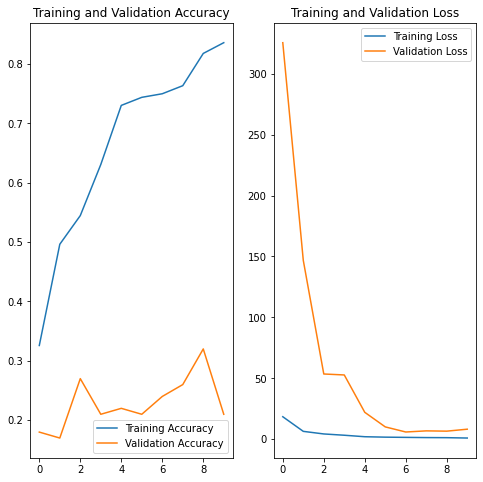

In [13]:
loss(history)

### Model 2

In [14]:
# Define Model

lrelu = lambda x: LeakyReLU(alpha=0.1)(x)

model_2 = Sequential()

model_2.add(Conv3D(16,(3,3,3),  padding='same', input_shape= (15,100,100,3) ))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(16,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Conv3D(32,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(32,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Conv3D(64,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(64,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Flatten())

model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation('elu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(32))
model_2.add(BatchNormalization())
model_2.add(Activation('elu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(5, activation='softmax'))

In [15]:
optimiser = Adam(learning_rate=0.001) 
model_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 15, 100, 100, 16)  1312      
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 100, 100, 16)  64        
_________________________________________________________________
activation_5 (Activation)    (None, 15, 100, 100, 16)  0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 15, 100, 100, 16)  6928      
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 100, 100, 16)  64        
_________________________________________________________________
activation_6 (Activation)    (None, 15, 100, 100, 16)  0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 100, 100, 16) 

In [16]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_2.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 64
Epoch 1/10
11/11 [==============================] - 101s 10s/step - loss: 1.5770 - categorical_accuracy: 0.3922 - val_loss: 2.3554 - val_categorical_accuracy: 0.2300

Epoch 00001: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00001-1.57699-0.39216-2.35536-0.23000.h5
Epoch 2/10
11/11 [==============================] - 96s 10s/step - loss: 0.9577 - categorical_accuracy: 0.6275 - val_loss: 3.2364 - val_categorical_accuracy: 0.2200

Epoch 00002: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00002-0.95771-0.62745-3.23643-0.22000.h5
Epoch 3/10
11/11 [==============================] - 98s 10s/step - loss: 0.7683 - categorical_accuracy: 0.7029 - val_loss: 3.7781 - val_categorical_accuracy: 0.2100

Epoch 00003: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00003-0.76827-0.70287-3.77807-0.21000.h5
Epoch 4/10
11/11 [==============================] - 94s 9s/step - loss: 0.5745 - cate

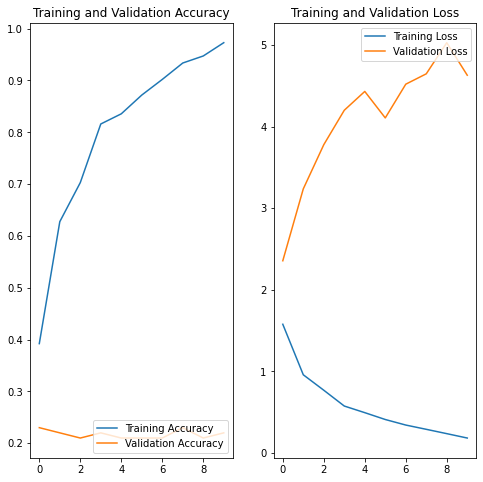

In [17]:
loss(history)

### Model 3

In [50]:
# Define Model

model_3 = Sequential()

model_3.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(16,(3,3,3),padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(32,(1,3,3), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(64,(1,2,2), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (1,3,3)))

model_3.add(Flatten())

model_3.add(Dense(1000, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(5, activation='softmax'))

In [51]:
optimiser = RMSprop(learning_rate=0.001) 
model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, 15, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_22 (Batc (None, 15, 120, 120, 8)   32        
_________________________________________________________________
activation_21 (Activation)   (None, 15, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 7, 60, 60, 8)      0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 7, 60, 60, 16)     3472      
_________________________________________________________________
batch_normalization_23 (Batc (None, 7, 60, 60, 16)     64        
_________________________________________________________________
activation_22 (Activation)   (None, 7, 60, 60, 16)   

In [36]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 64
Epoch 1/10
11/11 [==============================] - 108s 11s/step - loss: 8.8960 - categorical_accuracy: 0.2217 - val_loss: 1.5791 - val_categorical_accuracy: 0.2400

Epoch 00001: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00001-8.89601-0.22172-1.57906-0.24000.h5
Epoch 2/10
11/11 [==============================] - 103s 10s/step - loss: 1.5919 - categorical_accuracy: 0.3605 - val_loss: 1.5650 - val_categorical_accuracy: 0.2400

Epoch 00002: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00002-1.59185-0.36048-1.56499-0.24000.h5
Epoch 3/10
11/11 [==============================] - 110s 11s/step - loss: 1.4665 - categorical_accuracy: 0.3997 - val_loss: 1.5614 - val_categorical_accuracy: 0.2700

Epoch 00003: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00003-1.46655-0.39970-1.56137-0.27000.h5
Epoch 4/10
11/11 [==============================] - 104s 10s/step - loss: 1.3294 - 

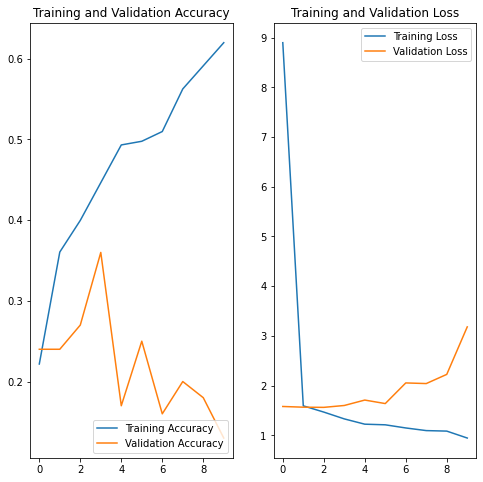

In [37]:
loss(history)

### Model 4

In [61]:
# Define Model

model_4 = Sequential()

model_4.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(16,(3,3,3),padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(16,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(32,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(32,(1,3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Conv3D(64,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(64,(1,3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(128,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (1,3,3)))

model_4.add(Flatten())

model_4.add(Dense(1000))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.25))

model_4.add(Dense(500))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.25))

model_4.add(Dense(5, activation='softmax'))

In [64]:
optimiser = RMSprop(learning_rate=0.001) 
model_4.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_4.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_18 (Conv3D)           (None, 15, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_26 (Batc (None, 15, 120, 120, 8)   32        
_________________________________________________________________
activation_25 (Activation)   (None, 15, 120, 120, 8)   0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 15, 120, 120, 8)   0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 15, 120, 120, 16)  3472      
_________________________________________________________________
batch_normalization_27 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
activation_26 (Activation)   (None, 15, 120, 120, 16)

In [41]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_4.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 64
Epoch 1/10
11/11 [==============================] - 113s 11s/step - loss: 1.7950 - categorical_accuracy: 0.3152 - val_loss: 1.8586 - val_categorical_accuracy: 0.2100

Epoch 00001: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00001-1.79501-0.31523-1.85858-0.21000.h5
Epoch 2/10
11/11 [==============================] - 106s 11s/step - loss: 1.4829 - categorical_accuracy: 0.4072 - val_loss: 4.1192 - val_categorical_accuracy: 0.1700

Epoch 00002: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00002-1.48287-0.40724-4.11920-0.17000.h5
Epoch 3/10
11/11 [==============================] - 108s 11s/step - loss: 1.2841 - categorical_accuracy: 0.4887 - val_loss: 4.6844 - val_categorical_accuracy: 0.1600

Epoch 00003: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00003-1.28413-0.48869-4.68439-0.16000.h5
Epoch 4/10
11/11 [==============================] - 105s 10s/step - loss: 1.1006 - 

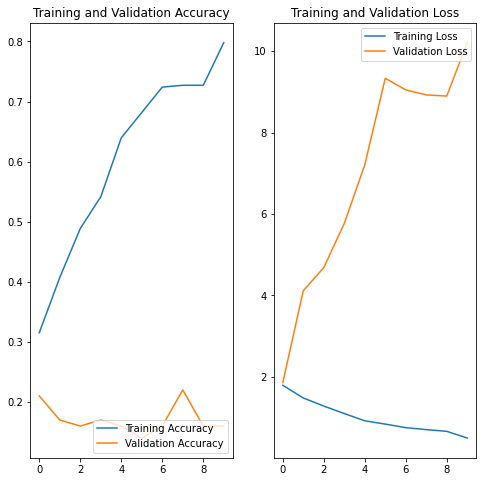

In [42]:
loss(history)

### Model 5

In [51]:
# Define Model

model_5 = Sequential()

model_5.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(16,(3,3,3),padding='same', activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(16,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(32,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(32,(3,3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
model_5.add(Conv3D(64,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(64,(3,3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(128,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (1,2,2)))

model_5.add(Flatten())

model_5.add(Dense(1000))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.25))

model_5.add(Dense(500))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_3.add(Dropout(0.25))

model_5.add(Dense(5, activation='softmax'))

In [52]:
optimiser = Adam(learning_rate=0.001) 
model_5.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_5.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_103 (Conv3D)          (None, 15, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_117 (Bat (None, 15, 120, 120, 8)   32        
_________________________________________________________________
activation_118 (Activation)  (None, 15, 120, 120, 8)   0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 15, 120, 120, 8)   0         
_________________________________________________________________
conv3d_104 (Conv3D)          (None, 15, 120, 120, 16)  3472      
_________________________________________________________________
batch_normalization_118 (Bat (None, 15, 120, 120, 16)  64        
_________________________________________________________________
activation_119 (Activation)  (None, 15, 120, 120, 16)

In [53]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_5.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 64
Epoch 1/10
11/11 [==============================] - 111s 11s/step - loss: 1.6629 - categorical_accuracy: 0.3318 - val_loss: 1.7407 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00001-1.66295-0.33183-1.74073-0.16000.h5
Epoch 2/10
11/11 [==============================] - 106s 11s/step - loss: 1.3001 - categorical_accuracy: 0.4600 - val_loss: 2.5067 - val_categorical_accuracy: 0.1900

Epoch 00002: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00002-1.30011-0.46003-2.50668-0.19000.h5
Epoch 3/10
11/11 [==============================] - 109s 11s/step - loss: 1.1209 - categorical_accuracy: 0.5143 - val_loss: 4.2084 - val_categorical_accuracy: 0.1600

Epoch 00003: saving model to Gesture_recog_2022-04-1002_56_54.588823/model-00003-1.12089-0.51433-4.20841-0.16000.h5
Epoch 4/10
11/11 [==============================] - 106s 11s/step - loss: 0.9669 - 

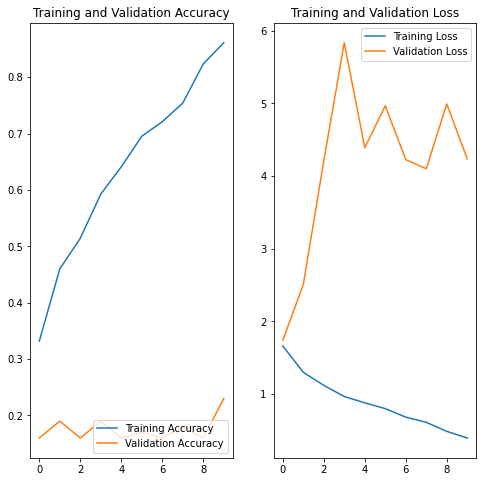

In [54]:
loss(history)

### Model 6

In [8]:
# Define Model

model_6 = Sequential()

model_6.add(Conv3D(32,(2,2,2), activation='elu', input_shape=(15,img_size_ht,img_size_wd,3), padding = "same" ))
model_6.add(Conv3D(32,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Conv3D(64,(2,2,2), activation='elu', padding = "same" ))
model_6.add(Conv3D(64,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Conv3D(128,(2,2,2), activation='elu', padding = "same" ))
model_6.add(Conv3D(128,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Flatten())

model_6.add(Dense(128, activation='elu'))
model_6.add(Dense(64, activation='elu'))
model_6.add(Dense(5, activation='softmax'))

2022-04-10 05:39:48.325246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 05:39:48.424404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 05:39:48.425188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 05:39:48.426623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
optimiser = SGD(learning_rate=0.001) 
model_6.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_6.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 15, 120, 120, 32)  800       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 14, 119, 119, 32)  8224      
_________________________________________________________________
dropout (Dropout)            (None, 14, 119, 119, 32)  0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 119, 119, 32)  128       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 59, 59, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 7, 59, 59, 64)     16448     
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 6, 58, 58, 64)     3

In [10]:
batch_size=30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_6.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30


2022-04-10 05:40:31.239716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-10 05:40:32.915081: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 165s 7s/step - loss: 2.8579 - categorical_accuracy: 0.3092 - val_loss: 1.7114 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-2.85788-0.30920-1.71142-0.16000.h5
Epoch 2/10
23/23 [==============================] - 112s 5s/step - loss: 1.2860 - categorical_accuracy: 0.4781 - val_loss: 1.9445 - val_categorical_accuracy: 0.1600

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.28599-0.47813-1.94451-0.16000.h5
Epoch 3/10
23/23 [==============================] - 110s 5s/step - loss: 1.0573 - categorical_accuracy: 0.5551 - val_loss: 2.2848 - val_categorical_accuracy: 0.1500

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.05726-0.55505-2.28483-0.15000.h5
Epoch 4/10
23/23 [==============================] - 109s 5s/step - loss: 0.8864 - categorical_accuracy: 0.6501 - val_loss: 2.5788 - val_categorical_accuracy: 0.1600


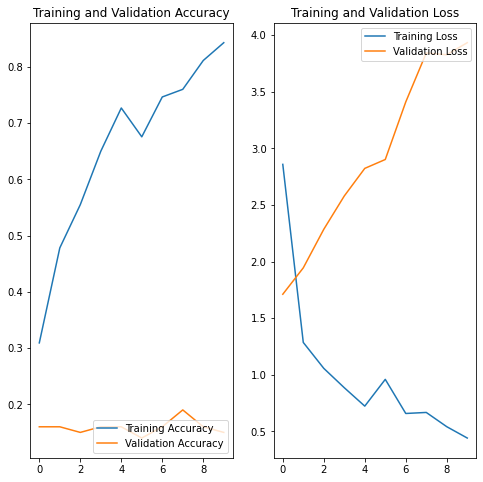

In [11]:
loss(history)

### Model 7

In [19]:
model_7 = Sequential()

model_7.add(TimeDistributed(Conv2D(32, (3,3), padding = "same"), input_shape=(15,img_size_ht,img_size_wd,3)))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5)))
            
model_7.add(TimeDistributed(Conv2D(32,(3,3))))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5)))
            
model_7.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_7.add(TimeDistributed(Conv2D(64, (3,3),  padding = "same")))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5)))
            
model_7.add(TimeDistributed(Conv2D(64,(3,3))))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5)))
            
model_7.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_7.add(TimeDistributed(Flatten()))
model_7.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5))

model_7.add(Dense(5, activation='softmax'))

In [20]:
optimiser = Adam(learning_rate=0.001) 
model_7.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_7.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_13 (TimeDis (None, 15, 120, 120, 32)  896       
_________________________________________________________________
time_distributed_14 (TimeDis (None, 15, 120, 120, 32)  128       
_________________________________________________________________
time_distributed_15 (TimeDis (None, 15, 120, 120, 32)  0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, 15, 120, 120, 32)  0         
_________________________________________________________________
time_distributed_17 (TimeDis (None, 15, 118, 118, 32)  9248      
_________________________________________________________________
time_distributed_18 (TimeDis (None, 15, 118, 118, 32)  128       
_________________________________________________________________
time_distributed_19 (TimeDis (None, 15, 118, 118, 32) 

In [21]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_7.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/10
23/23 [==============================] - 117s 5s/step - loss: 1.6714 - categorical_accuracy: 0.1825 - val_loss: 1.6644 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-1.67142-0.18250-1.66444-0.16000.h5
Epoch 2/10
23/23 [==============================] - 113s 5s/step - loss: 1.6202 - categorical_accuracy: 0.1961 - val_loss: 1.6065 - val_categorical_accuracy: 0.2500

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.62018-0.19608-1.60649-0.25000.h5
Epoch 3/10
23/23 [==============================] - 113s 5s/step - loss: 1.6051 - categorical_accuracy: 0.2459 - val_loss: 1.6082 - val_categorical_accuracy: 0.2400

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.60510-0.24585-1.60824-0.24000.h5
Epoch 4/10
23/23 [==============================] - 110s 5s/step - loss: 1.5997 - cate

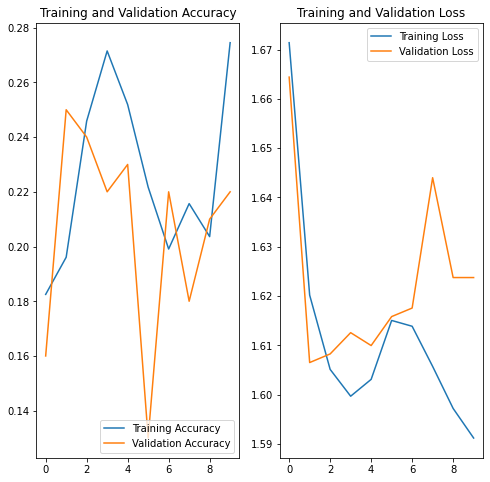

In [22]:
loss(history)

### Model 8

In [23]:
model_8 = Sequential()

model_8.add(TimeDistributed(Conv2D(32, (3,3), padding = "same"), input_shape=(15,img_size_ht,img_size_wd,3)))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5)))
            
model_8.add(TimeDistributed(Conv2D(32,(3,3))))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5)))
            
model_8.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_8.add(TimeDistributed(Conv2D(64, (3,3),  padding = "same")))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5)))
            
model_8.add(TimeDistributed(Conv2D(64,(3,3))))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5)))
            
model_8.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_8.add(TimeDistributed(Flatten()))
model_8.add(GRU(64,dropout=0.5, recurrent_dropout=0.5))

model_8.add(Dense(5, activation='softmax'))

In [24]:
optimiser = Adam(learning_rate=0.001) 
model_8.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_8.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_32 (TimeDis (None, 15, 120, 120, 32)  896       
_________________________________________________________________
time_distributed_33 (TimeDis (None, 15, 120, 120, 32)  128       
_________________________________________________________________
time_distributed_34 (TimeDis (None, 15, 120, 120, 32)  0         
_________________________________________________________________
time_distributed_35 (TimeDis (None, 15, 120, 120, 32)  0         
_________________________________________________________________
time_distributed_36 (TimeDis (None, 15, 118, 118, 32)  9248      
_________________________________________________________________
time_distributed_37 (TimeDis (None, 15, 118, 118, 32)  128       
_________________________________________________________________
time_distributed_38 (TimeDis (None, 15, 118, 118, 32) 

In [25]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_8.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/10
23/23 [==============================] - 120s 5s/step - loss: 1.7368 - categorical_accuracy: 0.1976 - val_loss: 1.8056 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-1.73683-0.19759-1.80559-0.16000.h5
Epoch 2/10
23/23 [==============================] - 115s 5s/step - loss: 1.6220 - categorical_accuracy: 0.1991 - val_loss: 1.6213 - val_categorical_accuracy: 0.1900

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.62197-0.19910-1.62134-0.19000.h5
Epoch 3/10
23/23 [==============================] - 112s 5s/step - loss: 1.6131 - categorical_accuracy: 0.1961 - val_loss: 1.6067 - val_categorical_accuracy: 0.2600

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.61313-0.19608-1.60673-0.26000.h5
Epoch 4/10
23/23 [==============================] - 111s 5s/step - loss: 1.6157 - cate

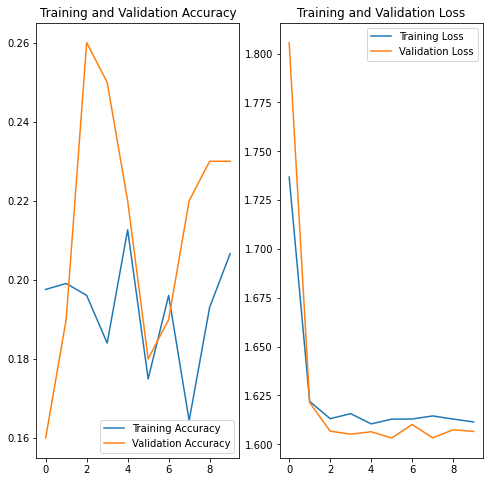

In [26]:
loss(history)

### Model 9

tran_model_5 = Sequential()
tran_model_5.add(TimeDistributed(EfficientNetB0(weights='imagenet', include_top=False),input_shape=Input_shape))

for layer in tran_model_5.layers:
    layer.trainable = False

tran_model_5.add(TimeDistributed(Flatten()))    
tran_model_5.add(GRU(128,dropout=0.5, recurrent_dropout=0.5))
tran_model_5.add(Dense(5,activation='softmax'))

In [27]:
model_9 = Sequential()
model_9.add(TimeDistributed(EfficientNetB0(weights='imagenet', include_top=False),input_shape=(15,img_size_ht,img_size_wd,3)))

for layer in model_9.layers:
    layer.trainable = False

model_9.add(TimeDistributed(Flatten()))    
model_9.add(GRU(128,dropout=0.5, recurrent_dropout=0.5))
model_9.add(Dense(5,activation='softmax'))

16719872/16705208 [==============================] - 0s 0us/step


In [28]:
optimiser = Adam(learning_rate=0.001) 
model_9.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_9.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_51 (TimeDis (None, 15, 3, 3, 1280)    4049571   
_________________________________________________________________
time_distributed_52 (TimeDis (None, 15, 11520)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               4473600   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 8,523,816
Trainable params: 4,474,245
Non-trainable params: 4,049,571
_________________________________________________________________
None


In [29]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_9.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/10
23/23 [==============================] - 124s 5s/step - loss: 2.7101 - categorical_accuracy: 0.2051 - val_loss: 1.9219 - val_categorical_accuracy: 0.2300

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-2.71015-0.20513-1.92185-0.23000.h5
Epoch 2/10
23/23 [==============================] - 111s 5s/step - loss: 1.8472 - categorical_accuracy: 0.1885 - val_loss: 1.6598 - val_categorical_accuracy: 0.1900

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.84721-0.18854-1.65979-0.19000.h5
Epoch 3/10
23/23 [==============================] - 109s 5s/step - loss: 1.6412 - categorical_accuracy: 0.1931 - val_loss: 1.6095 - val_categorical_accuracy: 0.1600

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.64116-0.19306-1.60951-0.16000.h5
Epoch 4/10
23/23 [==============================] - 107s 5s/step - loss: 1.6175 - cate

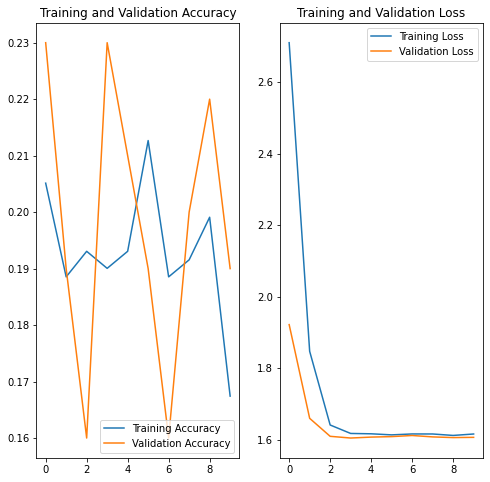

In [30]:
loss(history)

## Model 10

In [32]:
model_10 = Sequential()
model_10.add(TimeDistributed(EfficientNetB0(weights='imagenet', include_top=False),input_shape=(15,img_size_ht,img_size_wd,3)))

for layer in model_10.layers:
    layer.trainable = False

model_10.add(TimeDistributed(Flatten()))    
model_10.add(GRU(512,dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model_10.add(GRU(256,dropout=0.5, recurrent_dropout=0.5))
model_10.add(Dense(5,activation='softmax'))

In [33]:
optimiser = Adam(learning_rate=0.001) 
model_10.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_10.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_53 (TimeDis (None, 15, 3, 3, 1280)    4049571   
_________________________________________________________________
time_distributed_54 (TimeDis (None, 15, 11520)         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 15, 512)           18484224  
_________________________________________________________________
gru_3 (GRU)                  (None, 256)               591360    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
Total params: 23,126,440
Trainable params: 19,076,869
Non-trainable params: 4,049,571
_________________________________________________________________
None


In [34]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_10.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/10
23/23 [==============================] - 126s 5s/step - loss: 2.1408 - categorical_accuracy: 0.1931 - val_loss: 1.7998 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-2.14085-0.19306-1.79981-0.16000.h5
Epoch 2/10
23/23 [==============================] - 114s 5s/step - loss: 1.6905 - categorical_accuracy: 0.2051 - val_loss: 1.6064 - val_categorical_accuracy: 0.2300

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.69046-0.20513-1.60639-0.23000.h5
Epoch 3/10
23/23 [==============================] - 112s 5s/step - loss: 1.6663 - categorical_accuracy: 0.1825 - val_loss: 1.6872 - val_categorical_accuracy: 0.2300

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.66634-0.18250-1.68716-0.23000.h5
Epoch 4/10
23/23 [==============================] - 110s 5s/step - loss: 1.6683 - cate

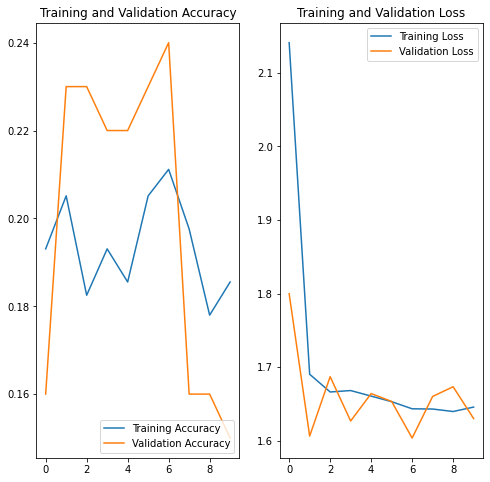

In [36]:
loss(history)

## Redefining Generator Function

In [37]:
def generator_new(source_path, folder_list, batch_size, factor_ht=0, factor_wd=0 ):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    img_idx = np.arange(0,30,2) #create a list of image numbers you want to use for a particular video
    
    while True:
        t = np.random.permutation(folder_list)


        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                   
                    # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    image = (image - np.percentile(image,5))/ (np.percentile(image,95) - np.percentile(image,5))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]
                    batch_data[folder,idx,:,:,1] = image[:,:,1]
                    batch_data[folder,idx,:,:,2] = image[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        rem_image = len(folder_list)%batch_size
        batch += 1
        if(rem_image!=0):
            batch_data = np.zeros((rem_image,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((rem_image,5)) # batch_labels is the one hot representation of the output
            for folder in range(rem_image): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                   # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    image = (image - np.percentile(image,5))/ (np.percentile(image,95) - np.percentile(image,5))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]
                    batch_data[folder,idx,:,:,1] = image[:,:,1]
                    batch_data[folder,idx,:,:,2] = image[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
            

#### Of all the models ran, we will try out the models that showed the most promising results and weren't overfitting. <br><br>Also increasing the num_epochs to 20

In [38]:
num_epochs=20

### Re-running Model 1

In [45]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_1.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/20
23/23 [==============================] - 132s 6s/step - loss: 28.1982 - categorical_accuracy: 0.3092 - val_loss: 202.0981 - val_categorical_accuracy: 0.2300

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-28.19823-0.30920-202.09813-0.23000.h5
Epoch 2/20
23/23 [==============================] - 126s 6s/step - loss: 8.8581 - categorical_accuracy: 0.4872 - val_loss: 59.9333 - val_categorical_accuracy: 0.2800

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-8.85811-0.48718-59.93332-0.28000.h5
Epoch 3/20
23/23 [==============================] - 125s 6s/step - loss: 5.1951 - categorical_accuracy: 0.5973 - val_loss: 20.6318 - val_categorical_accuracy: 0.3200

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-5.19509-0.59729-20.63180-0.32000.h5
Epoch 4/20
23/23 [==============================] - 124s 6s/step - loss: 4.8

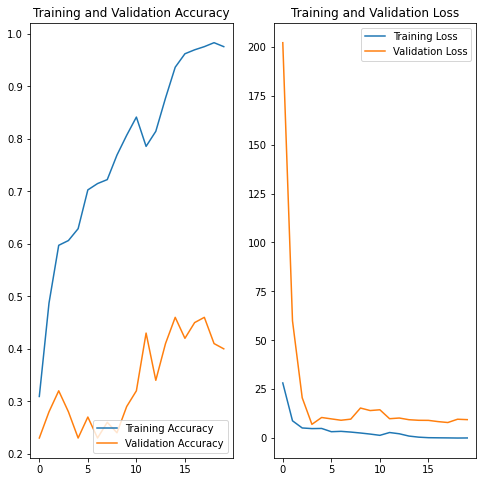

In [49]:
loss(history)

### Model 3 - Re-run

In [58]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/20
23/23 [==============================] - 125s 6s/step - loss: 0.7205 - categorical_accuracy: 0.7481 - val_loss: 1.3971 - val_categorical_accuracy: 0.5500

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-0.72049-0.74811-1.39715-0.55000.h5
Epoch 2/20
23/23 [==============================] - 124s 6s/step - loss: 0.6082 - categorical_accuracy: 0.7753 - val_loss: 1.8856 - val_categorical_accuracy: 0.4400

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-0.60816-0.77526-1.88557-0.44000.h5
Epoch 3/20
23/23 [==============================] - 124s 6s/step - loss: 0.6023 - categorical_accuracy: 0.7813 - val_loss: 2.2435 - val_categorical_accuracy: 0.4200

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-0.60226-0.78130-2.24350-0.42000.h5
Epoch 4/20
23/23 [==============================] - 122s 6s/step - loss: 0.5853 - cate

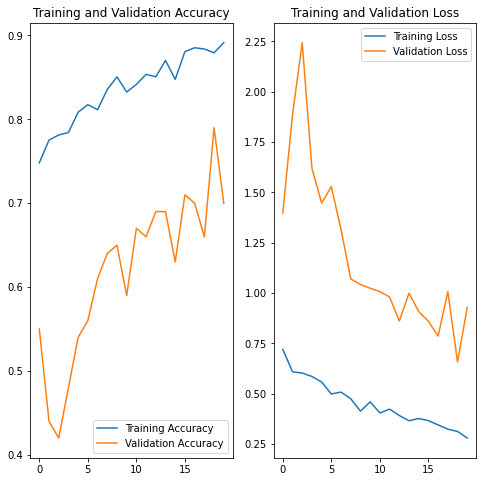

In [59]:
loss(history)

### Model - 11 - Model 3 re-run above has given good results. Increasing the number of filters per layer

In [76]:
# Define Model

model_11 = Sequential()

model_11.add(Conv3D(16,(3,3,3),padding='same',  input_shape= (15,img_size_ht,img_size_wd,3)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(MaxPooling3D(pool_size= (2,2,2)))

model_11.add(Conv3D(32,(1,3,3), padding='same'))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(MaxPooling3D(pool_size= (2,2,2)))

model_11.add(Conv3D(64,(1,2,2), padding='same'))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(MaxPooling3D(pool_size= (1,3,3)))

model_11.add(Conv3D(128,(1,2,2), padding='same'))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(MaxPooling3D(pool_size= (1,3,3)))

model_11.add(Flatten())

model_11.add(Dense(1000, activation='relu'))
model_11.add(Dropout(0.5))

model_11.add(Dense(500, activation='relu'))
model_11.add(Dropout(0.5))

model_11.add(Dense(5, activation='softmax'))

In [77]:
optimiser = RMSprop(learning_rate=0.001) 
model_11.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_11.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_38 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
batch_normalization_48 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
activation_47 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
max_pooling3d_27 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_39 (Conv3D)           (None, 7, 60, 60, 32)     4640      
_________________________________________________________________
batch_normalization_49 (Batc (None, 7, 60, 60, 32)     128       
_________________________________________________________________
activation_48 (Activation)   (None, 7, 60, 60, 32)   

In [78]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_11.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/20
23/23 [==============================] - 130s 6s/step - loss: 10.5472 - categorical_accuracy: 0.2278 - val_loss: 1.6373 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-10.54724-0.22775-1.63730-0.16000.h5
Epoch 2/20
23/23 [==============================] - 147s 7s/step - loss: 1.9366 - categorical_accuracy: 0.2247 - val_loss: 1.6189 - val_categorical_accuracy: 0.1700

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.93661-0.22474-1.61888-0.17000.h5
Epoch 3/20
23/23 [==============================] - 145s 7s/step - loss: 1.7250 - categorical_accuracy: 0.2594 - val_loss: 1.8586 - val_categorical_accuracy: 0.2100

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.72502-0.25943-1.85864-0.21000.h5
Epoch 4/20
23/23 [==============================] - 142s 6s/step - loss: 1.6221 - ca

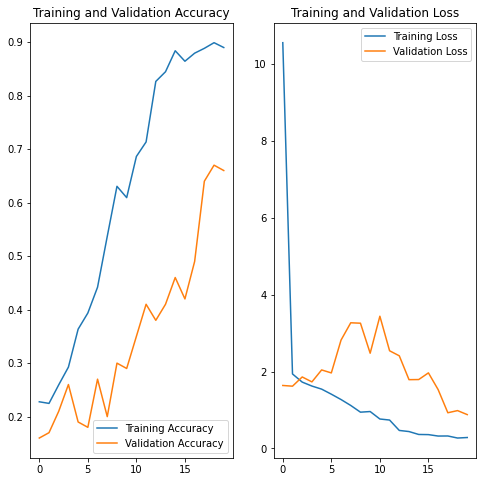

In [79]:
loss(history)

### Model 7 - Re-run

In [54]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_7.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ../input/gesture-recognition/train ; batch size = 30
Epoch 1/20
23/23 [==============================] - 112s 5s/step - loss: 1.5951 - categorical_accuracy: 0.2866 - val_loss: 1.6430 - val_categorical_accuracy: 0.2100

Epoch 00001: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00001-1.59507-0.28658-1.64296-0.21000.h5
Epoch 2/20
23/23 [==============================] - 115s 5s/step - loss: 1.6026 - categorical_accuracy: 0.2760 - val_loss: 1.6424 - val_categorical_accuracy: 0.2100

Epoch 00002: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00002-1.60259-0.27602-1.64239-0.21000.h5
Epoch 3/20
23/23 [==============================] - 114s 5s/step - loss: 1.5888 - categorical_accuracy: 0.3213 - val_loss: 1.6441 - val_categorical_accuracy: 0.2100

Epoch 00003: saving model to Gesture_recog_2022-04-1005_38_37.254969/model-00003-1.58878-0.32127-1.64413-0.21000.h5
Epoch 4/20
23/23 [==============================] - 110s 5s/step - loss: 1.5842 - cate

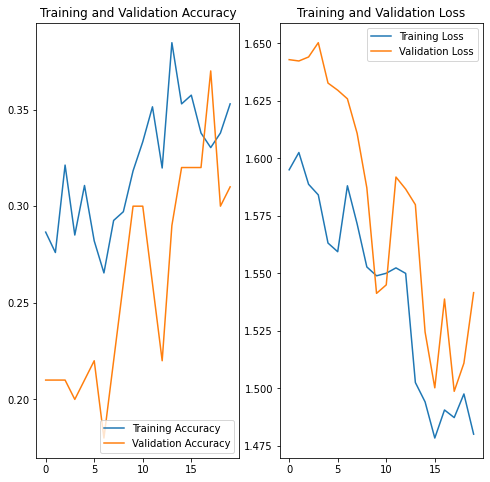

In [56]:
loss(history)

### Model 8 - Re-run

In [ ]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_8.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)